Text(0.5, 1.0, 'Order Value of Every Month')

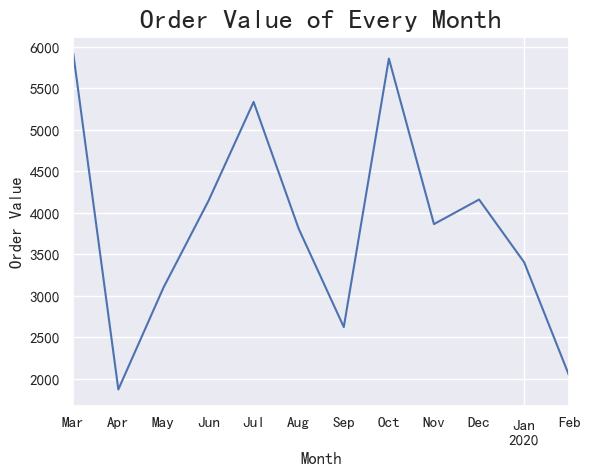

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

df = pd.read_excel(r'cuscapi.xls')
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df.describe()
user_group = df.groupby('user_id').sum()
user_group.sort_values(by='order_products',ascending=False)
user_group.describe()

plt.rcParams['font.family'] = 'SimHei'

df['order_dt'] = df['order_dt'].dt.date
df['month'] = df['order_dt'].astype('datetime64[M]')

df.groupby('month').order_amount.sum().plot()
plt.xlabel('Month')
plt.ylabel('Order Value')
plt.title('Order Value of Every Month',fontsize=20)

Text(0.5, 1.0, 'Merchandise Sales of Every Month')

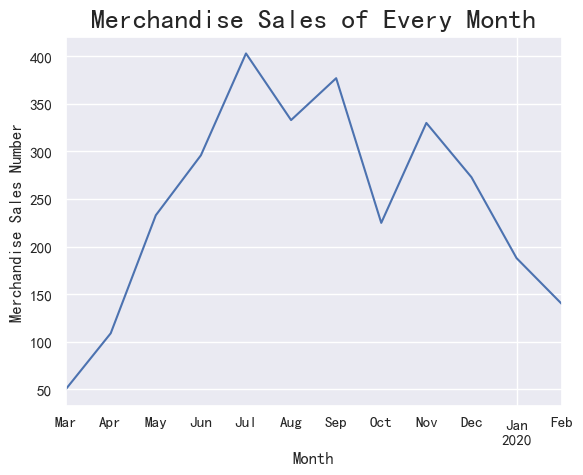

In [4]:
df.groupby('month').order_products.sum().plot()
plt.xlabel('Month')
plt.ylabel('Merchandise Sales Number')
plt.title('Merchandise Sales of Every Month',fontsize=20)

Text(0.5, 1.0, 'Number of Purchases of Every Month')

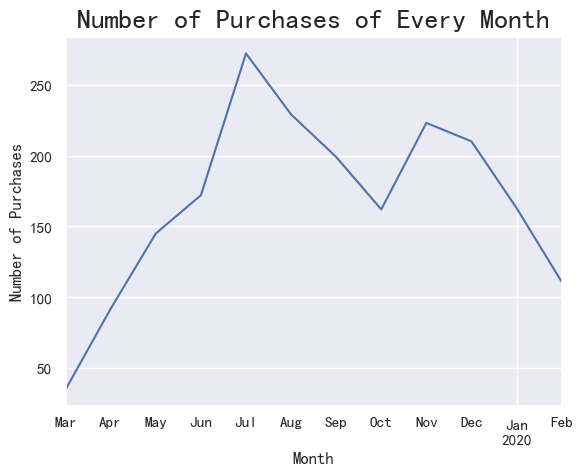

In [6]:
df.groupby('month').user_id.count().plot()
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases of Every Month',fontsize=20)

[[1.         0.86831664]
 [0.86831664 1.        ]]


Text(0.5, 1.0, 'Scatter Plot')

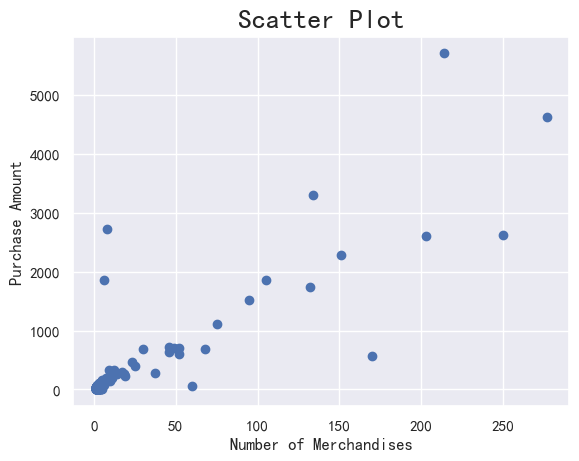

In [7]:
user_consume = df.groupby('user_id').sum()
plt.scatter(x = user_consume['order_products'],y=user_consume['order_amount'])

#correlation
print(np.corrcoef(user_consume['order_products'],user_consume['order_amount']))

plt.xlabel('Number of Merchandises')
plt.ylabel('Purchase Amount')
plt.title('Scatter Plot',fontsize=20)

Text(0.5, 1.0, '用户购买金额分布直方图')

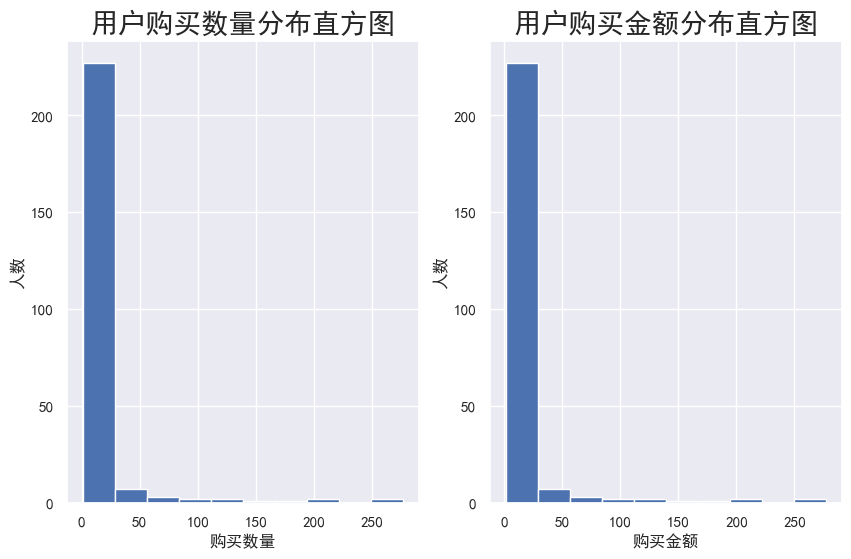

In [8]:
consume_products = user_consume['order_products']
consume_amount = user_consume['order_amount']

fig = plt.figure(figsize=(10.,6))
fig.add_subplot(1,2,1)
consume_products.hist(bins=10)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买数量分布直方图',fontsize=20)

fig.add_subplot(1,2,2)
consume_products.hist(bins=10)
plt.xlabel('购买金额')
plt.ylabel('人数')
plt.title('用户购买金额分布直方图',fontsize=20)

Text(0.5, 1.0, '第一次消费会员数和时间折线图')

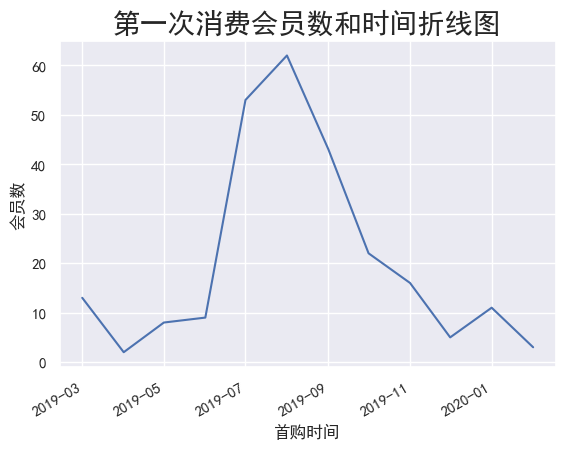

In [9]:
df.groupby('user_id').month.min().value_counts().plot()
plt.xlabel('首购时间')
plt.ylabel('会员数')
plt.title('第一次消费会员数和时间折线图',fontsize=20)

Text(0.5, 1.0, '最后一次消费会员数和时间折线图')

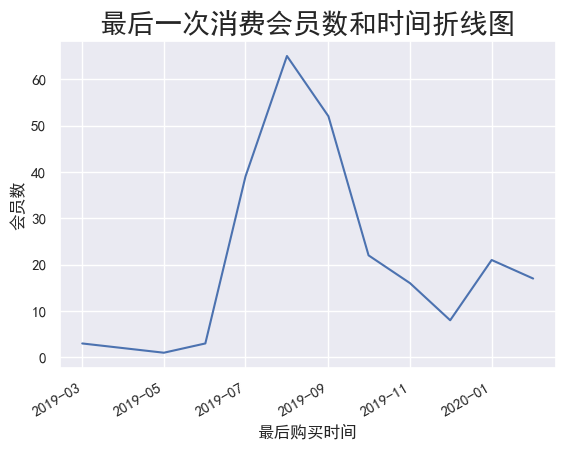

In [10]:
df.groupby('user_id').month.max().value_counts().plot()
plt.xlabel('最后购买时间')
plt.ylabel('会员数')
plt.title('最后一次消费会员数和时间折线图',fontsize=20)

2019-03-01   0.62
2019-04-01   1.00
2019-05-01   0.89
2019-06-01   0.68
2019-07-01   0.65
2019-08-01   0.56
2019-09-01   0.65
2019-10-01   0.66
2019-11-01   0.67
2019-12-01   0.70
2020-01-01   0.68
2020-02-01   0.82
dtype: float64

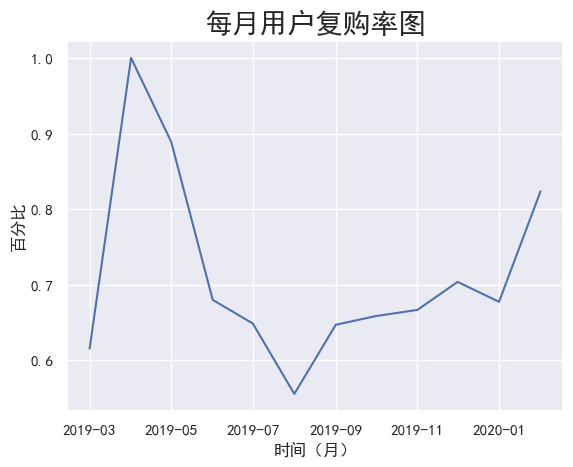

In [11]:
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)
columns_month=df.month.dt.date.sort_values().unique()
pivoted_counts.columns = columns_month

pivoted_counts_trasf = pivoted_counts.applymap(lambda x:1 if x>1 else np.nan if x==0 else 0)

month_counts_reorder_rate = pivoted_counts_trasf.sum()/pivoted_counts_trasf.count()
plt.plot(month_counts_reorder_rate)
plt.xlabel('时间（月）')
plt.ylabel('百分比')
plt.title('每月用户复购率图',fontsize=20)
month_counts_reorder_rate

Text(0.5, 1.0, '每月消费和二次消费以上用户人数')

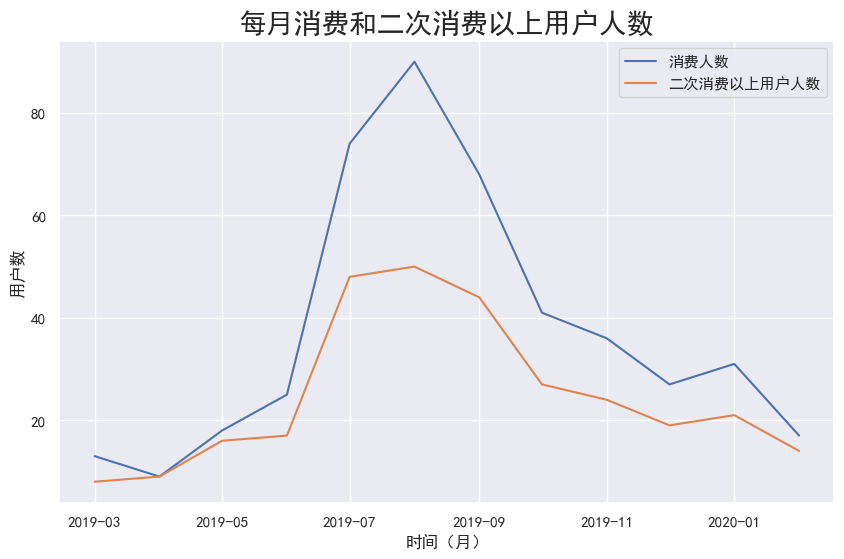

In [12]:
a,b = plt.subplots(figsize=(10,6))
b.plot(pivoted_counts_trasf.count())
b.plot(pivoted_counts_trasf.sum())
legends = ['消费人数','二次消费以上用户人数']
b.legend(legends)
plt.xlabel('时间（月）')
plt.ylabel('用户数')
plt.title('每月消费和二次消费以上用户人数',fontsize=20)


(array([17956., 17987., 18017., 18048., 18078., 18109., 18140., 18170.,
        18201., 18231., 18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

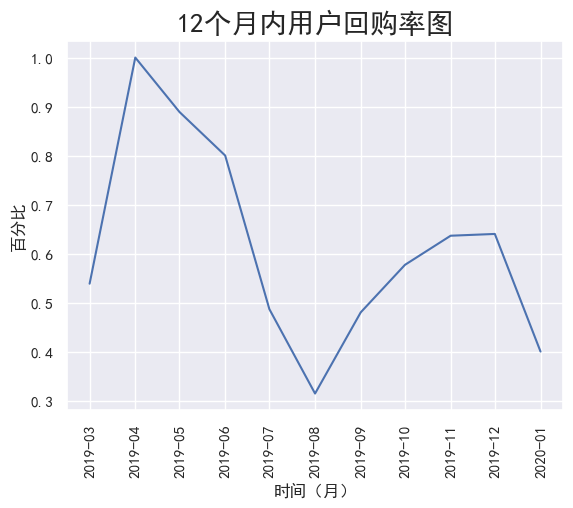

In [13]:
pivoted_amount = df.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)
columns_month=df.month.dt.date.sort_values().unique()
pivoted_amount.columns = columns_month

pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>1 else 0)

def purchase_return(data):
    status = []
    for i in range(11):
        if data[i]>=1:
            if data[i+1]>=1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status)

pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.columns = columns_month

pivoted_purchase_return_rate = pivoted_purchase_return.sum()/pivoted_purchase_return.count()
plt.plot(pivoted_purchase_return_rate)
plt.xlabel('时间（月）')
plt.ylabel('百分比')
plt.title('12个月内用户回购率图',fontsize=20)
plt.xticks(rotation=90)


Text(0.5, 1.0, '每月消费和每月回购人数')

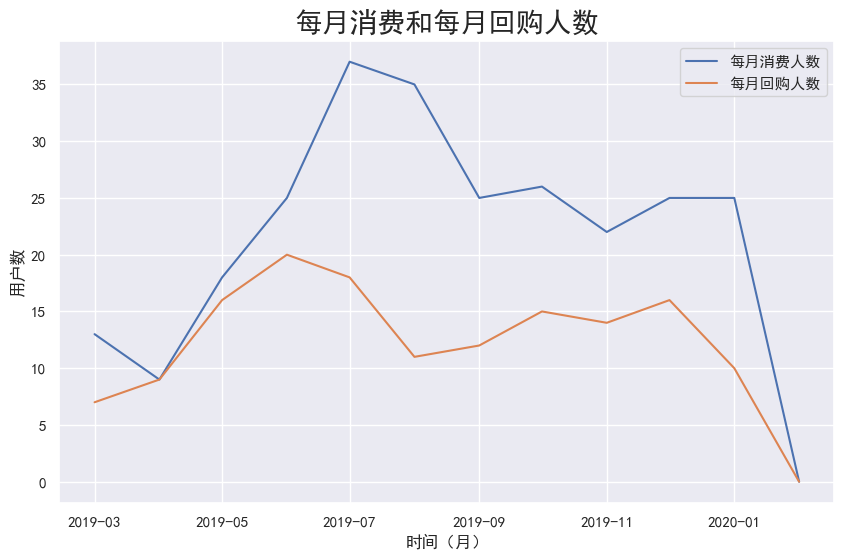

In [14]:
a,b = plt.subplots(figsize=(10,6))
b.plot(pivoted_purchase_return.count())
b.plot(pivoted_purchase_return.sum())
legends = ['每月消费人数','每月回购人数']
b.legend(legends)
plt.xlabel('时间（月）')
plt.ylabel('用户数')
plt.title('每月消费和每月回购人数',fontsize=20)


Text(0.5, 1.0, '每月回购率和每月复购率')

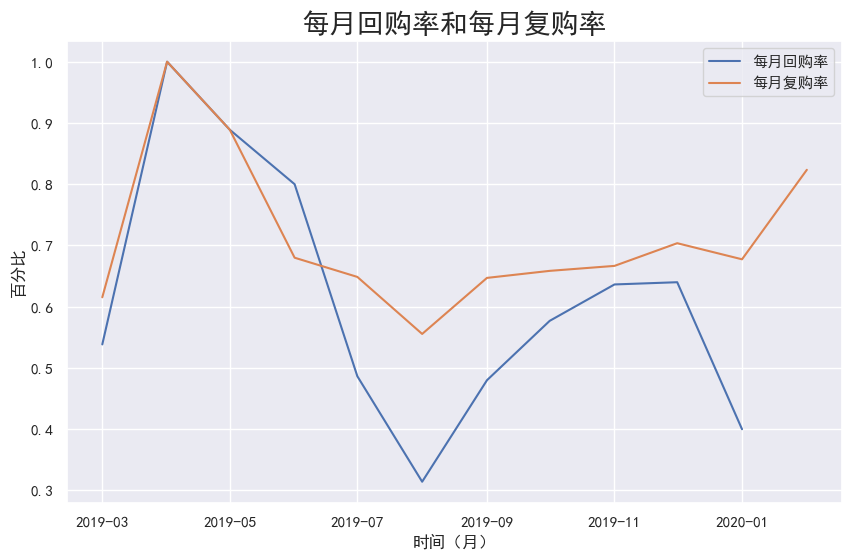

In [15]:
a,b = plt.subplots(figsize=(10,6))
b.plot(pivoted_purchase_return_rate)
b.plot(month_counts_reorder_rate)
legends = ['每月回购率','每月复购率']
b.legend(legends)
plt.xlabel('时间（月）')
plt.ylabel('百分比')
plt.title('每月回购率和每月复购率',fontsize=20)

Text(0.5, 1.0, '用户累计贡献金额百分比')

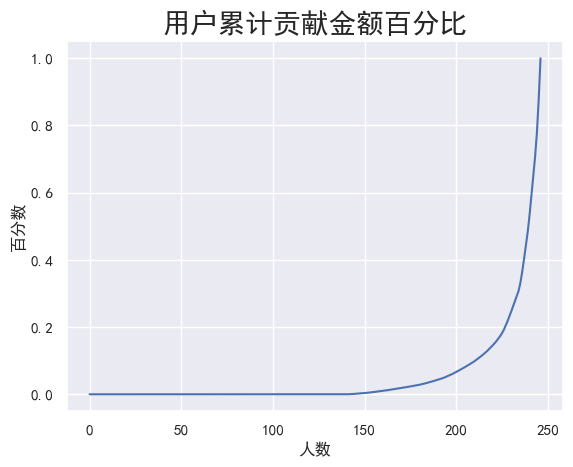

In [16]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()

amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.amount_cumsum.apply(lambda x:x/amount_total)
plt.plot(user_amount.prop)
plt.xlabel('人数')
plt.ylabel('百分数')
plt.title('用户累计贡献金额百分比',fontsize=20)

In [17]:
order_dt_min = df.groupby('user_id').order_dt.min()
order_dt_max = df.groupby('user_id').order_dt.max()
life_time = (order_dt_max-order_dt_min).reset_index()
life_time.describe()

,order_dt
count,247
mean,32 days 03:59:01.700404858
std,73 days 19:15:10.251372268
min,0 days 00:00:00
25%,0 days 00:00:00
50%,1 days 00:00:00
75%,13 days 00:00:00
max,351 days 00:00:00


Text(0.5, 1.0, '用户生命周期直方图')

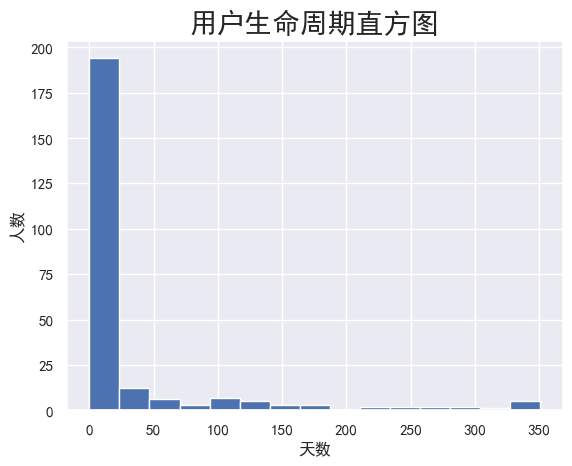

In [18]:
((order_dt_max-order_dt_min)/np.timedelta64(1,'D')).hist(bins=15)
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('用户生命周期直方图',fontsize=20)

Text(0.5, 1.0, '二次消费以上用户生命周期直方图')

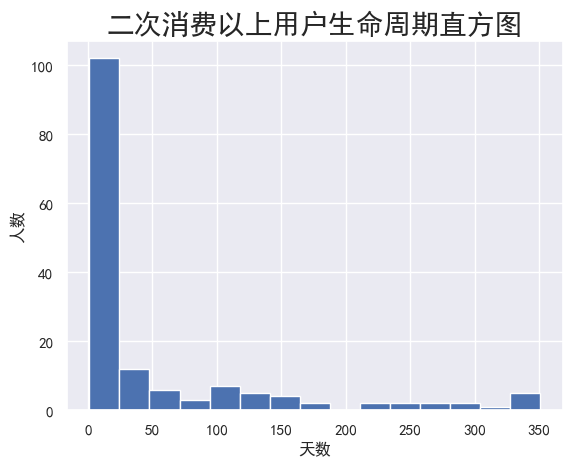

In [19]:
life_time['life_time'] = life_time.order_dt/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=15)
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('二次消费以上用户生命周期直方图',fontsize=20)